<a href="https://colab.research.google.com/github/Rodrigo-Lopes-de-Andrade/Portifolio_Rodrigo_Andrade/blob/main/Paris_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img alt="RLA" width="15%" src="https://github.com/Rodrigo-Lopes-de-Andrade/Portifolio_Rodrigo_Andrade/blob/main/RLA.png?raw=true">

#### **RLA Data Science**
*by [Rodrigo Andrade](https://www.linkedin.com/in/rodrigo-lopes-de-andrade-51753246/)*

---

# Análise dos Dados do Airbnb - *Paris*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Paris, e ver quais insights podem ser extraídos a partir de dados brutos.**

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória será baixado o seguinte arquivo 
* `listings.csv` - *Summary information and metrics for listings in Paris (good for visualisations).*

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2020-12-14/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()
df['neighbourhood'].unique()

array(['Entrepôt', 'Observatoire', 'Temple', 'Hôtel-de-Ville', 'Opéra',
       'Louvre', 'Popincourt', 'Buttes-Montmartre', 'Élysée', 'Panthéon',
       'Gobelins', 'Luxembourg', 'Buttes-Chaumont', 'Palais-Bourbon',
       'Reuilly', 'Bourse', 'Ménilmontant', 'Vaugirard',
       'Batignolles-Monceau', 'Passy'], dtype=object)

In [5]:
# mostrar as 5 ultimas entradas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
65912,47021162,JUNIOR SUITE 2 A 3 PERSONNES,375098995,Washington,NaN,Louvre,48.86594,2.33800,Private room,176,1,0,NaN,NaN,9,346
65913,47024721,"""La Sorbonne"" Amazing Loft (841)",204417026,Loic Et Alizée,NaN,Panthéon,48.84766,2.34761,Entire home/apt,1179,1,0,NaN,NaN,4,361
65914,47024723,"""La Sorbonne"" Amazing Loft (841)",188481801,Brice Et Anaïs,NaN,Panthéon,48.84710,2.34751,Entire home/apt,1179,1,0,NaN,NaN,5,361
65915,47025787,Chambre privée dans le salon à Paris 75019.,72300807,Naïm,NaN,Buttes-Chaumont,48.89255,2.37625,Private room,24,1,0,NaN,NaN,4,175
65916,47029229,THE PARISIAN NEST - 3 room with balcony - 60m2,12663713,Laurent,NaN,Buttes-Chaumont,48.88787,2.39222,Entire home/apt,110,7,0,NaN,NaN,1,60


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 65917
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 23% das linhas.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.237996
last_review                       0.237996
name                              0.000971
host_name                         0.000425
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

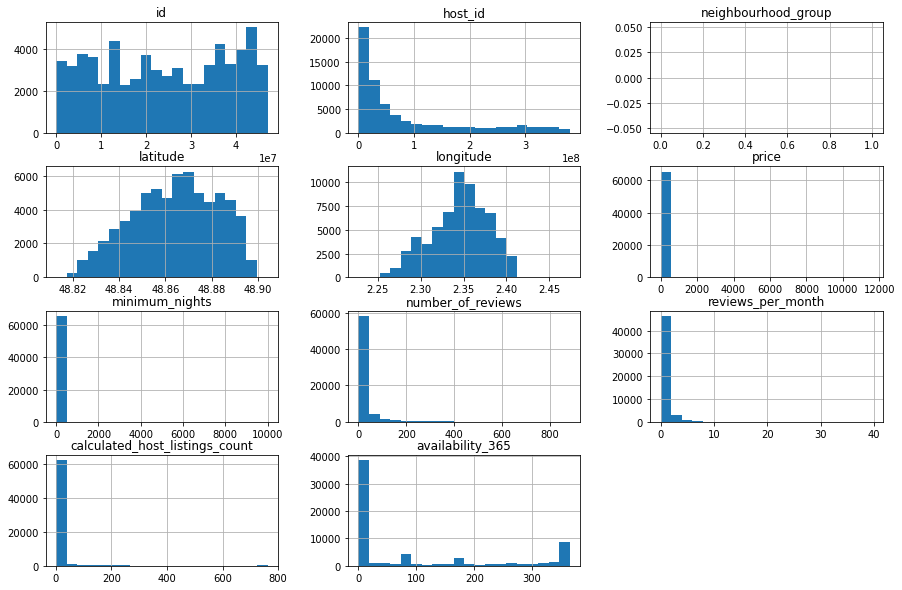

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel? Há outliers presente?** 

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [39]:
# ver a média da coluna `price``
df.price.mean()

114.28020085865558

In [10]:
# Ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,65917.000000,65917.000000,65917.000000,50229.000000,65917.000000,65917.000000
mean,114.280201,5.656113,18.783394,0.689335,16.427098,96.354173
std,220.155923,44.279940,40.678117,0.983954,86.017717,137.362947
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,59.000000,1.000000,1.000000,0.130000,1.000000,0.000000
50%,80.000000,2.000000,5.000000,0.360000,1.000000,0.000000
75%,120.000000,4.000000,18.000000,0.870000,2.000000,179.000000
max,11600.000000,9999.000000,882.000000,39.620000,762.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 120, porém seu valor máximo é 11600.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights


minimum_nights: valores acima de 30:
906 entradas
1.3745%


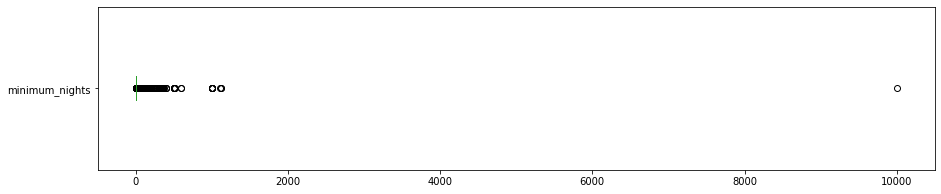

In [14]:
# minimum_nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(15,3))
plt.show
# ver a qantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights>30])))
print("{:.4f}%".format((len(df[df.minimum_nights>30])/df.shape[0])*100))


#### Boxplot para price

minimum_nights: valores acima de 1000:
207 entradas
0.3140%


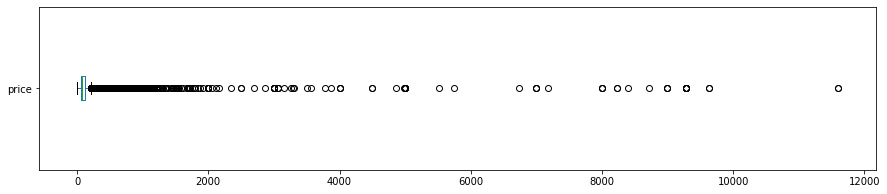

In [33]:
# price
df.price.plot(kind="box", vert=False, figsize=(15,3))
plt.show
# ver a qantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 1000:")
print("{} entradas".format(len(df[df.price>1000])))
print("{:.4f}%".format((len(df[df.price>1000])/df.shape[0])*100))


#### Histogramas sem outliers

Idenficados os outliers nas variáveis `price` e `minimum_nights` , vamos limpar o DataFrame delas e plotar novamente o histograma 

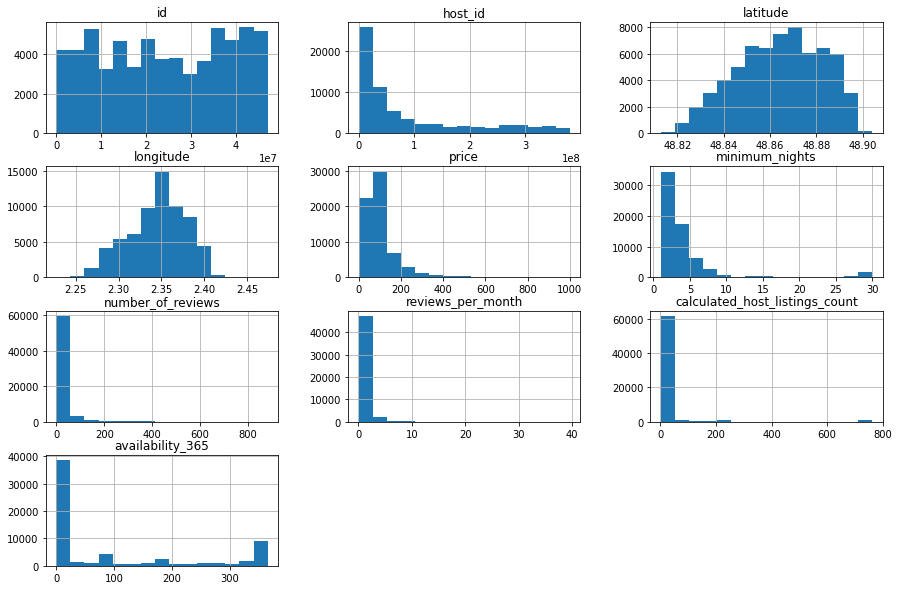

In [35]:
#remover os *outliers* em um novo DataFrame 
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price>1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>30].index, axis=0, inplace=True)

#remover `neighbourhood_group` pois esta vazio 
df_clean.drop("neighbourhood_group", axis=1, inplace=True)

# Plotar o histograma para variáveis numéricas  
df_clean.hist(bins=15, figsize=(15,10));


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [37]:
# criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.014079,-0.001881,0.007315,0.077178,0.224094
minimum_nights,-0.014079,1.000000,-0.049669,-0.095561,0.022700,0.115227
number_of_reviews,-0.001881,-0.049669,1.000000,0.754796,-0.016809,0.198413
reviews_per_month,0.007315,-0.095561,0.754796,1.000000,0.019709,0.246147
calculated_host_listings_count,0.077178,0.022700,-0.016809,0.019709,1.000000,0.066151
availability_365,0.224094,0.115227,0.198413,0.246147,0.066151,1.000000


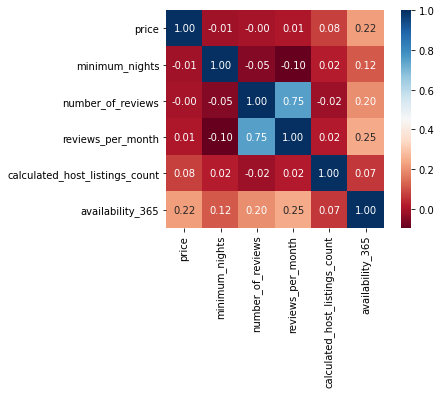

In [38]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [40]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    55565
Private room        7457
Hotel room          1373
Shared room          416
Name: room_type, dtype: int64

In [41]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.857339
Private room       0.115058
Hotel room         0.021185
Shared room        0.006419
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.



In [42]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Élysée            183.083570
Louvre            155.010036
Luxembourg        152.167358
Palais-Bourbon    152.048110
Bourse            142.568099
Passy             140.302487
Hôtel-de-Ville    137.996290
Temple            132.189020
Panthéon          118.417363
Opéra             115.287551
Name: price, dtype: float64

*Como* são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

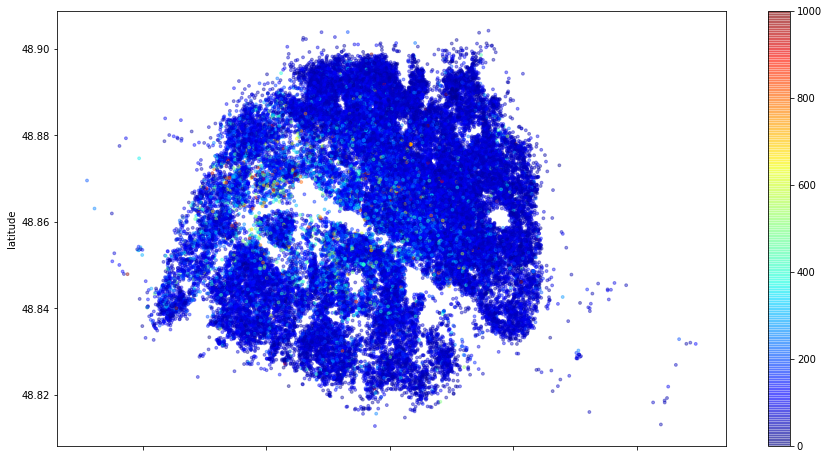

In [45]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(15,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [46]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

3.8746971964635635

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Ressalta-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.
